In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
data_train = pd.read_excel('./Data_Train.xlsx')
data_test = pd.read_excel('./Test_set.xlsx')

In [346]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [347]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [348]:
df = data_train.append(data_test)

C:\Users\Afriduzzaman.afridi\AppData\Local\Temp\ipykernel_4648\1514921738.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_train.append(data_test)


In [349]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [350]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [351]:
def con_dep_time(time):
    time = pd.to_datetime(time)
    hour = time.hour
    minute = time.minute
    return np.round((hour + minute / 60 ),2)

In [352]:
df['Dep_Time'] = df['Dep_Time'].apply(lambda x: con_dep_time(x))
df['Dep_Time'] = df['Dep_Time'].astype('float64')

In [353]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22.33,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18.08,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16.83,21:35,4h 45m,1 stop,No info,13302.0


In [354]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Year_of_Journey'] = df['Date_of_Journey'].dt.year
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day

C:\Users\Afriduzzaman.afridi\AppData\Local\Temp\ipykernel_4648\1517400127.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [355]:
df = df.drop('Date_of_Journey', axis=1)

In [356]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13:15,7h 25m,2 stops,No info,7662.0,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.08,23:30,5h 25m,1 stop,No info,6218.0,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.83,21:35,4h 45m,1 stop,No info,13302.0,2019,1,3


In [357]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:con_dep_time(x))

In [358]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,1.17,2h 50m,non-stop,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13.25,7h 25m,2 stops,No info,7662.0,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,4.42,19h,2 stops,No info,13882.0,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.08,23.50,5h 25m,1 stop,No info,6218.0,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.83,21.58,4h 45m,1 stop,No info,13302.0,2019,1,3


In [359]:
def convert_to_hour(duration):
    duration = pd.to_timedelta(duration)
    duration = duration.total_seconds()/3600
    return np.round(duration,2)

In [360]:
df['Duration'] = df['Duration'].apply(lambda x: convert_to_hour(x))

In [361]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Dep_Time            float64
Arrival_Time        float64
Duration            float64
Total_Stops          object
Additional_Info      object
Price               float64
Year_of_Journey       int64
Month_of_Journey      int64
Day_of_Journey        int64
dtype: object

In [362]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [363]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [364]:
df[df['Total_Stops'].isnull() == True]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
9039,Air India,Delhi,Cochin,NaN,9.75,9.42,23.67,NaN,No info,7480.0,2019,6,5


In [365]:
df['Total_Stops'] = df['Total_Stops'].fillna('0 Stop')

In [366]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0 Stop')

In [367]:
df['Total_Stops'].value_counts()

1 stop     7056
0 Stop     4341
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [368]:
df['Total_Stops'] = df['Total_Stops'].str.split(' ').str[0]
df['Total_Stops'] = df['Total_Stops'].astype('int')

In [369]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Dep_Time            float64
Arrival_Time        float64
Duration            float64
Total_Stops           int32
Additional_Info      object
Price               float64
Year_of_Journey       int64
Month_of_Journey      int64
Day_of_Journey        int64
dtype: object

In [370]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,1.17,2.83,0,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13.25,7.42,2,No info,7662.0,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,4.42,19.00,2,No info,13882.0,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.08,23.50,5.42,1,No info,6218.0,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.83,21.58,4.75,1,No info,13302.0,2019,1,3


In [371]:
df['Route_1'] = df['Route'].str.split('→').str[0]
df['Route_2'] = df['Route'].str.split('→').str[1]
df['Route_3'] = df['Route'].str.split('→').str[2]
df['Route_4'] = df['Route'].str.split('→').str[3]
df['Route_5'] = df['Route'].str.split('→').str[4]

df['Route_1'] = df['Route_1'].fillna('None')
df['Route_2'] = df['Route_2'].fillna('None')
df['Route_3'] = df['Route_3'].fillna('None')
df['Route_4'] = df['Route_4'].fillna('None')
df['Route_5'] = df['Route_5'].fillna('None')

In [372]:
df = df.drop('Route', axis=1)

In [373]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,22.33,1.17,2.83,0,No info,3897.0,2019,3,24,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,5.83,13.25,7.42,2,No info,7662.0,2019,1,5,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,9.42,4.42,19.00,2,No info,13882.0,2019,9,6,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18.08,23.50,5.42,1,No info,6218.0,2019,12,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,16.83,21.58,4.75,1,No info,13302.0,2019,1,3,BLR,NAG,DEL,None,None


In [374]:
airline_df = df.groupby('Airline').mean()

C:\Users\Afriduzzaman.afridi\AppData\Local\Temp\ipykernel_4648\867649330.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airline_df = df.groupby('Airline').mean()


In [375]:
airline_df = airline_df.reset_index()

C:\Users\Afriduzzaman.afridi\AppData\Local\Temp\ipykernel_4648\3568417057.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(y='Airline', x='Price', data=airline_df, ci='sd')


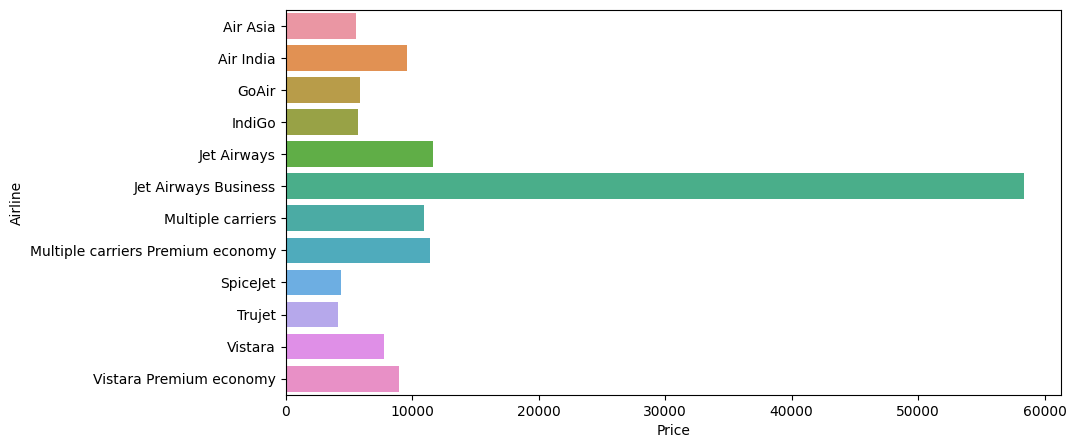

In [376]:
plt.figure(figsize= (10,5))
sns.barplot(y='Airline', x='Price', data=airline_df, ci='sd')
plt.yticks(rotation=0);

In [377]:
# year_df = df.groupby('Year_of_Journey').mean()
# year_df = year_df.reset_index()

# plt.figure(figsize= (10,5))
# sns.barplot(y='Year_of_Journey', x='Price', data=year_df, errorbar='sd')
# plt.yticks(rotation=0);


C:\Users\Afriduzzaman.afridi\AppData\Local\Temp\ipykernel_4648\355938119.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_df = df.groupby('Month_of_Journey').mean().reset_index();


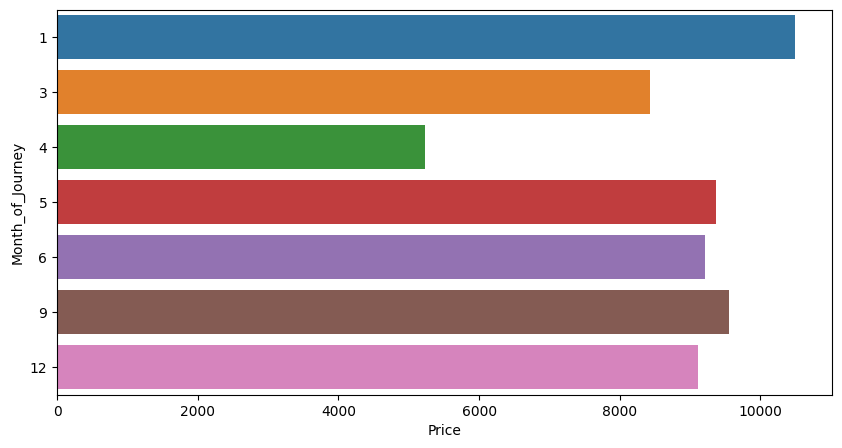

In [378]:
plt.figure(figsize= (10,5))
# sns.barplot(y='Month_of_Journey', x='Price', data=df.groupby('Month_of_Journey').mean().reset_index(), errorbar='sd')
# plt.xticks(rotation=90);

month_df = df.groupby('Month_of_Journey').mean().reset_index();
sns.barplot(y='Month_of_Journey', x='Price', data=month_df, orient='h');

In [379]:
df = df.drop('Year_of_Journey', axis=1)

C:\Users\Afriduzzaman.afridi\AppData\Local\Temp\ipykernel_4648\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

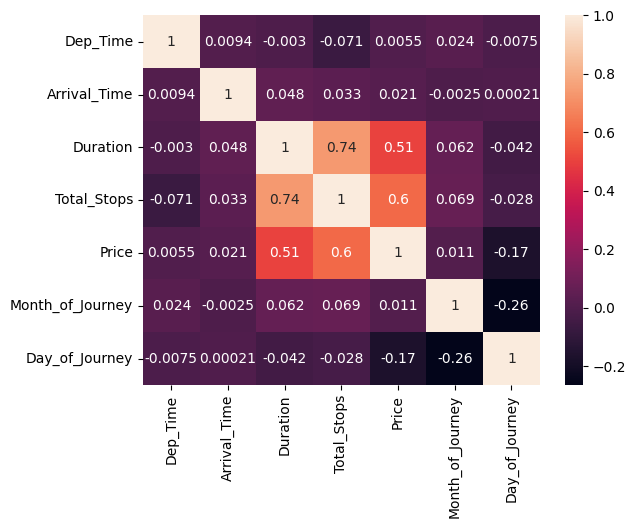

In [380]:
sns.heatmap(df.corr(), annot=True)

In [381]:
df = pd.get_dummies(df)

In [382]:
df_data = df.iloc[0:10683,:]
df_data.shape

(10683, 143)

In [383]:
submission_data = df.iloc[10683:,:]
submission_data = submission_data.drop('Price', axis=1)
submission_data.shape

(2671, 142)

Linear Model for Prediction

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [385]:
X = df_data.drop('Price', axis=1)
y = df_data['Price']

In [386]:
y.shape

(10683,)

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [388]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler()

In [389]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [390]:
from sklearn.linear_model import LinearRegression

In [391]:
linear_model = LinearRegression()

In [392]:
linear_model.fit(scaled_X_train, y_train)

LinearRegression()

In [393]:
linear_pred = linear_model.predict(scaled_X_test)

In [394]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
def report_model(model):
    model.fit(scaled_X_train, y_train)
    model_pred = model.predict(scaled_X_test)
    print(f'the mean absolute percentage error of the {model} is {mean_absolute_percentage_error(model_pred, y_test)}')
    print(f'the mean absolute error of the {model} is {mean_absolute_error(model_pred, y_test)}')
    print(f'the mean squared error of the {model} is { np.sqrt(mean_squared_error(model_pred, y_test))}')

In [395]:
report_model(linear_model)

the mean absolute percentage error of the LinearRegression() is 0.19155515462307834
the mean absolute error of the LinearRegression() is 1042559423754850.2
the mean squared error of the LinearRegression() is 3.758108155084613e+16


Elastic Net with Grid Search CV

In [396]:
from sklearn.linear_model import ElasticNet

In [397]:
elastic_net = ElasticNet()

In [398]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 20, 50,100],  
    'l1_ratio': [0.2, 0.5, 0.8,0.9,1],  
    'fit_intercept': [True, False] 
}

In [399]:
from sklearn.model_selection import GridSearchCV
elastic_grid_model = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)

In [400]:
report_model(elastic_grid_model)

c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.731e+07, tolerance: 1.277e+07
  model = cd_fast.enet_coordinate_descent(
c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+07, tolerance: 1.265e+07
  model = cd_fast.enet_coordinate_descent(
c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.340e+08, tolerance: 1.294e+07
  model = cd_fast.enet_

the mean absolute percentage error of the GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.5, 0.8, 0.9, 1]}) is 0.1881439927448742
the mean absolute error of the GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.5, 0.8, 0.9, 1]}) is 1578.573022719621
the mean squared error of the GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.5, 0.8, 0.9, 1]}) is 2399.691462906734


In [401]:
elastic_grid_model.best_estimator_

ElasticNet(alpha=10.0, l1_ratio=1)

In [402]:
from sklearn.tree import DecisionTreeRegressor

In [403]:
tree_model = DecisionTreeRegressor()

In [404]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [405]:
report_model(tree_model)

the mean absolute percentage error of the DecisionTreeRegressor() is 0.08192559978191832
the mean absolute error of the DecisionTreeRegressor() is 688.1753510140405
the mean squared error of the DecisionTreeRegressor() is 1876.3002296109398


In [406]:
param_dist = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6),
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

In [407]:
tree_grid_model = GridSearchCV(tree_model,param_dist,cv=10)

In [408]:
# tree_grid_model.fit(X_train, y_train)

In [409]:
from sklearn.ensemble import RandomForestRegressor

In [410]:
rf_regg = RandomForestRegressor()

In [411]:
rf_regg.fit(X_train, y_train)

RandomForestRegressor()

In [412]:
report_model(rf_regg)

the mean absolute percentage error of the RandomForestRegressor() is 0.0743461567386009
the mean absolute error of the RandomForestRegressor() is 638.2771938860411
the mean squared error of the RandomForestRegressor() is 1616.859004250444


Looks like random forest, give sthe best performance based on the mean absolute percentage error (~7%)
So we can go with the random forest approach.
Let's train again with X and y in the random forest model to find the actual outcome of submission dataset.

In [413]:
rf_regg.fit(X,y)

RandomForestRegressor()

In [414]:
submission_predict = rf_regg.predict(submission_data)

In [415]:
submission_predict

array([14714.  ,  4254.63, 12898.  , ..., 16770.68, 13784.12,  7317.36])

Thank You................................